In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from dateutil.parser import parse
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
international_flight_2020 = pd.read_csv('data/international_flight_2020.csv')
national_flight_2020 = pd.read_csv('data/national_flight_2020.csv')

In [3]:
all_flight_2020 = pd.concat([international_flight_2020, national_flight_2020])

In [4]:
all_flight_2020.head()

,number,typecode,origin,destination,day,origin_ident,origin_type,origin_name,origin_latitude_deg,origin_longitude_deg,...,origin_municipality,destination_ident,destination_type,destination_name,destination_latitude_deg,destination_longitude_deg,destination_continent,destination_iso_country,destination_iso_region,destination_municipality
0,NaN,F50,YPAD,WSSL,2020-01-01 00:00:00+00:00,YPAD,large_airport,Adelaide International Airport,-34.945000,138.531006,...,Adelaide,WSSL,medium_airport,Seletar Airport,1.416950,103.867996,AS,SG,SG-02,Seletar
1,MU771,A359,YSSY,EHAM,2020-01-01 00:00:00+00:00,YSSY,large_airport,Sydney Kingsford Smith International Airport,-33.946098,151.177002,...,Sydney,EHAM,large_airport,Amsterdam Airport Schiphol,52.308601,4.763890,EU,NL,NL-NH,Amsterdam
2,NaN,B789,SAEZ,LEBL,2020-01-01 00:00:00+00:00,SAEZ,large_airport,Ministro Pistarini International Airport,-34.822200,-58.535800,...,Buenos Aires,LEBL,large_airport,Barcelona International Airport,41.297100,2.078460,EU,ES,ES-CT,Barcelona
3,NaN,A332,RKSI,LIRF,2020-01-01 00:00:00+00:00,RKSI,large_airport,Incheon International Airport,37.469101,126.450996,...,Seoul,LIRF,large_airport,Leonardo da Vinci–Fiumicino Airport,41.800278,12.238889,EU,IT,IT-62,Rome
4,NaN,B788,SBGR,LOWW,2020-01-01 00:00:00+00:00,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.435556,-46.473057,...,São Paulo,LOWW,large_airport,Vienna International Airport,48.110298,16.569700,EU,AT,AT-9,Vienna (Schwechat)


In [18]:
def build_daily_graph(df, days):
    graph_list = []
    for day in days:
        cur_day_flights = df[df['date'] == day]
        directed_G = nx.DiGraph()
#         directed_G.add_nodes_from(airports)
#         for airport in airports:
#             directed_G.add_no de(airport)
        for index, row in cur_day_flights.iterrows():
            if directed_G.has_edge(row['origin'], row['destination']):
                directed_G.edges[row['origin'], row['destination']]['weight'] += 1
            else:
                directed_G.add_edge(row['origin'], row['destination'], weight=1)
        graph_list.append(directed_G)
    return graph_list

In [19]:
def find_SCC_isolate_number(graph_list):
    number_SCC_list = []
#     number_isolate_list = []
    for graph in graph_list:
        number_SCC_list.append(nx.number_strongly_connected_components(graph))
#         number_isolate_list.append(nx.number_of_isolates(graph))
    return number_SCC_list

In [40]:
test_data = all_flight_2020
test_data['today']  = test_data['day'].apply(lambda x: parse(x).date())
test_data['date'] = test_data['today'].apply(lambda x: (x.strftime('%Y-%m-%d')))

In [41]:
days = set(test_data['date'])
days

{'2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-

In [42]:
G = build_daily_graph(test_data, days)

In [43]:
x = find_SCC_isolate_number(G)

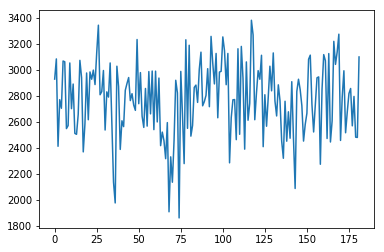

In [44]:
plt.plot(x)

In [36]:
x.plot(kind='line', figsize=(12, 8), color=['blue', 'red'])
plt.title("The Comparsion of All Flights in 2019 and 2020", y=1.013, fontsize=22)
plt.xlabel("Date [Month]", labelpad=16)
plt.ylabel("Count [Flight]", labelpad=16);      

AttributeError: 'list' object has no attribute 'plot'